In [5]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('data/Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [26]:
Ground_Truth_BBOX=[1900,700,1800,1800]
Prediction_BBOX=[1800,800,1500,1500]

## 轉換成 [X0,Y0,X1,Y1]

In [21]:
Ground_Truth_BBOX_Transform=[Ground_Truth_BBOX[0],Ground_Truth_BBOX[1],Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform=[Prediction_BBOX[0],Prediction_BBOX[1],Prediction_BBOX[0]+Prediction_BBOX[2],Prediction_BBOX[1]+Prediction_BBOX[3]]

c:\python36\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()
c:\python36\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  # This is added back by InteractiveShellApp.init_path()
c:\python36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  
c:\python36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1

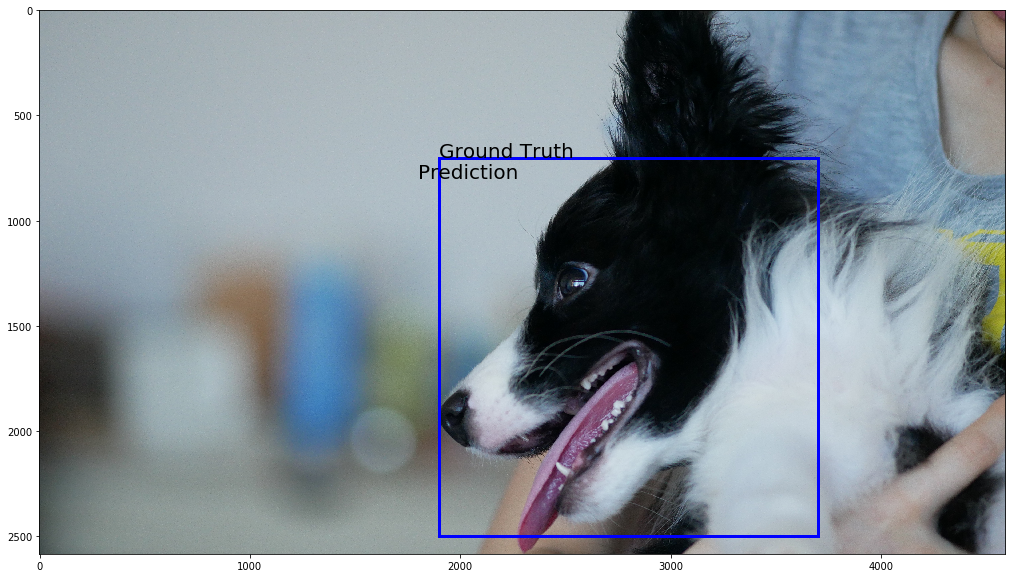

In [22]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Prediction',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

## 定義IOU計算

In [23]:
def bb_intersection_over_union(boxA, boxB):
    print("boxA=", boxA, ", boxB=", boxB)
    # determine the (x, y)-coordinates of the intersection rectangle
    # boxA= [1900, 700, 3700, 2500] , boxB= [1800, 800, 3300, 2300]
    xA = max(boxA[0], boxB[0]) # 最大x0=1900
    yA = max(boxA[1], boxB[1]) # 最大y0=800
    xB = min(boxA[2], boxB[2]) # 最小x1=3300
    yB = min(boxA[3], boxB[3]) # 最小y1=2300
    print("xA=", xA, ", yA=", yA, ", xB=", xB , ", yB=", yB)

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    print("max(0, xB - xA + 1)=", max(0, xB - xA + 1), ", max(0, yB - yA + 1)=", max(0, yB - yA + 1))

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [7]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = '''找出比較大的X0'''
    yA = '''找出比較大的y0'''
    xB = '''找出比較小的X1'''
    yB = '''找出比較小的y1'''

    ## 計算交集區域
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    ## 計算各自的BBOX大小
    boxAArea = (boxA[''] - boxA[''] + 1) * (boxA[''] - boxA[''] + 1)
    boxBArea = (boxB[''] - boxB[''] + 1) * (boxB[''] - boxB[''] + 1)
    
    ## 計算IOU
    iou = '''交集/聯集'''

    # return the intersection over union value
    return iou

In [24]:
IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

boxA= [1900, 700, 3700, 2500] , boxB= [1900, 700, 3700, 2500]
xA= 1900 , yA= 700 , xB= 3700 , yB= 2500
max(0, xB - xA + 1)= 1801 , max(0, yB - yA + 1)= 1801


In [25]:
print('IOU值：',IOU) 
'''應該要得到0.6196482836879266'''

IOU值： 1.0


'應該要得到0.6196482836879266'